### Projet 4: Régression en grande dimension et sparsité
Réalisé par Djamila AZZOUZ
Etudiante en probabilités et statistiques des nouvelles données

In [2]:
#Importation des bibliothèques nécessaires pour la réalisation du projet:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

#### Partie 1: Régularisation

##### Etape 1: 

Construction du modèle de régression:

In [3]:
n=1000
p=5000
eta=np.random.normal(0,1,n)
#Construction de beta:
beta=np.zeros(p)
for i in range(15):
    beta[i]=1

In [4]:
#Construction de la matrice:
X=np.zeros((n,p))
for i in range(p):
    X[:,i]=np.random.normal(0,1,size=n)
# produit de X et et de beta
prod=[sum([X[i][j]*beta[j] for j in range(len(beta))]) for i in range(len(X))]

In [5]:
#Construction du modèle:
Y=[sum([prod[i],eta[i]])for i in range(len(prod))]

##### Etape 2 : 

Séparation des données en données test et d'apprentissage

In [6]:
#Séparation des données en données training et test:
# Séparer les données en deux parties : une pour l'entraînement et une autre pour les tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34)

##### Question A: 

Estimation du vecteur de régression par la méthode Elastic-Net

In [7]:
# Créer un objet ElasticNetCV
model = ElasticNetCV(alphas=np.arange(0, 1.1, 0.1))
# Entraîner le modèle en utilisant les données d'entraînement
model.fit(X_train, Y_train)
# Afficher les paramètres alpha et l1_ratio optimaux
print("alpha =", model.alpha_)
# Estimer le vecteur de régression des beta_chap
beta_chap= model.coef_


alpha = 0.0


##### Question B: 

Représentation graphique du chemin de régularisation Lasso

In [8]:
lamda=np.arange(1,200,1)
# Créer un objet LassoCV
model1 = LassoCV(alphas=lamda)
# Récupérer les valeurs de alpha et les vecteurs de régression(beta_chap_L) pour chaque itération
alpha, chemin, _ = model1.path(X_train, Y_train)

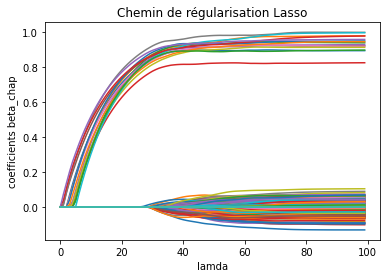

In [9]:
# Tracer le chemin de la régularisation pour différentes valeurs de lamda
plt.plot(chemin.T)
plt.xlabel('lamda')
plt.ylabel('coefficients beta_chap')
plt.title('Chemin de régularisation Lasso')
plt.show()


##### Question C:

 Déterminer la valeur optimale du paramètre de régularisation pour chaque méthode:

In [10]:
# Créer des objets LassoCV, RidgeCV et ElasticNetCV
lasso_model = LassoCV()
ridge_model = RidgeCV()
enet_model = ElasticNetCV()

# Entraîner les modèles en utilisant les données d'entraînement
lasso_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)
enet_model.fit(X_train, Y_train)

# Afficher la valeur optimale du paramètre de régularisation pour chaque modèle
print("paramètre_opt_Lasso: lamda_chap =", lasso_model.alpha_)
print("paramètre_opt_Ridge: u_chap =", ridge_model.alpha_)
print("paramètre_opt_Elastic Net: alpha_chap =", enet_model.alpha_)

paramètre_opt_Lasso: lamda_chap = 0.09412902461024794
paramètre_opt_Ridge: u_chap = 10.0
paramètre_opt_Elastic Net: alpha_chap = 0.1424103103522794


###### Observation:

 En effet, on remarque que pour la méthode du LASSO le lamda optimal est d'une valeur de 0.08


-U_chap pour l'estimateur de Ridge est d'une valeur optimal égal à 10


-Elastic-net pour l'estimateur de elastic-net est d'une valeur optimal égal à 0.11

##### Question D:

Detection du meilleur estimateur qui fournit une meilleure prédiction sur l'échantillon test

###### Pour savoir quel estimateur fournit une meilleure prédiction sur l'échantillon de test, nous devons d'abord entraîner les modèles en utilisant les données d'entraînement, puis évaluer leur performance sur les données de test en utilisant une mesure de performance appropriée, comme l'erreur quadratique moyenne (MSE)  et/ ou le coefficient de détermination (R²)

In [11]:
# Prédire les valeurs de Y à l'aide des modèles entraînés
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
enet_pred = enet_model.predict(X_test)

# Calculer les erreurs quadratiques moyennes(MSE) et les coefficients de détermination(R^2) pour chaque modèle
#Calcul de l'erreur quadratique moyenne et R^2 pour le modèle avec l'estimateur Lasso:
lasso_mse = mean_squared_error(Y_test, lasso_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)
#Calcul de l'erreur quadratique moyenne et R^2 pour le modèle avec l'estimateur Ridge:
ridge_mse = mean_squared_error(Y_test, ridge_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)
#Calcul de l'erreur quadratique moyenne et R^2 pour le modèle avec l'estimateur Elastic-net:
enet_mse = mean_squared_error(Y_test, enet_pred)
enet_r2 = r2_score(Y_test, enet_pred)

# Afficher les performances des modèle avec le Lasso:
print("Lasso MSE=", lasso_mse)
print("Lasso R²=", lasso_r2)
# Afficher les performances des modèle avec le Ridge:
print("Ridge MSE=", ridge_mse)
print("Ridge R²=", ridge_r2)
# Afficher les performances des modèle avec Elastic-net:
print("Elastic Net MSE=", enet_mse)
print("Elastic Net R²=", enet_r2)


Lasso MSE= 1.3750203414923243
Lasso R²= 0.9248324345282256
Ridge MSE= 17.291040485159204
Ridge R²= 0.05475913444836755
Elastic Net MSE= 2.0787302515410335
Elastic Net R²= 0.8863630685555637


###### Le meilleur estimateur est l'estimateur LASSO car le risque quadratique associé est d'une valeur de 1.26 et avec un coefficient de détermination très proche de 1 ce qui montre que notre modèle de prédiction est meilleur avec le LASSO

##### Question 2:

Refaire les mêmes questions en changeant le vecteur beta

In [12]:
#Refaire les mêmes questions pour pour un autre beta:
beta1=np.zeros(p)
for i   in range(1500):
    beta1[i]=1

In [13]:
# produit de X et et de beta
prod1=[sum([X[i][j]*beta1[j] for j in range(len(beta1))]) for i in range(len(X))]

In [14]:
#Construction du modèle:
Y1=[sum([prod1[i],eta[i]])for i in range(len(prod1))]

In [15]:
# Séparer les données en deux parties : une pour l'entraînement et une autre pour les tests
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.34)

In [16]:
# Créer un objet ElasticNetCV
model2 = ElasticNetCV(alphas=np.arange(0, 1.1, 0.1))
# Entraîner le modèle en utilisant les données d'entraînement
model2.fit(X1_train, Y1_train)
# Afficher les paramètres alpha et l1_ratio optimaux
print("alpha =", model2.alpha_)
# Estimer le vecteur de régression
vect_reg = model2.coef_

alpha = 0.0


In [17]:
# Créer un objet LassoCV
lamda1=np.arange(1,200,1)
model3 = LassoCV(alphas=lamda1)
# Récupérer les valeurs de alpha et les vecteurs de régression pour chaque itération
alphas, coef, _ = model3.path(X1_train, Y1_train)

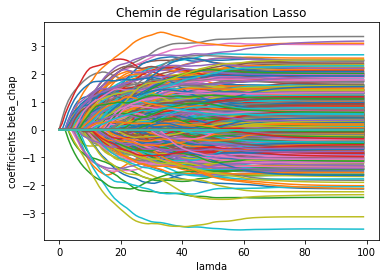

In [18]:
# Tracer le chemin de la régularisation pour différentes valeurs de lamda
plt.plot(coef.T)
plt.xlabel('lamda')
plt.ylabel('coefficients beta_chap')
plt.title('Chemin de régularisation Lasso')
plt.show()

In [19]:
# Créer des objets LassoCV, RidgeCV et ElasticNetCV
lasso_model1 = LassoCV()
ridge_model1 = RidgeCV()
enet_model1 = ElasticNetCV()

# Entraîner les modèles en utilisant les données d'entraînement
lasso_model1.fit(X1_train, Y1_train)
ridge_model1.fit(X1_train, Y1_train)
enet_model1.fit(X1_train, Y1_train)

# Afficher la valeur optimale du paramètre de régularisation pour chaque modèle
print("val_opt_Lasso: alpha =", lasso_model1.alpha_)
print("val_opt_Ridge: alpha =", ridge_model1.alpha_)
print("val_opt_Elastic Net: alpha =", enet_model1.alpha_)


val_opt_Lasso: alpha = 5.628739761842149
val_opt_Ridge: alpha = 0.1
val_opt_Elastic Net: alpha = 0.012071026295699054


In [20]:
# Prédire les valeurs de Y à l'aide des modèles entraînés
lasso_pred1 = lasso_model1.predict(X1_test)
ridge_pred1 = ridge_model1.predict(X1_test)
enet_pred1 = enet_model1.predict(X1_test)

# Calculer les erreurs quadratiques moyennes et les coefficients de détermination pour chaque modèle
lasso_mse1 = mean_squared_error(Y1_test, lasso_pred1)
lasso_r21 = r2_score(Y1_test, lasso_pred1)

ridge_mse1 = mean_squared_error(Y1_test, ridge_pred1)
ridge_r21 = r2_score(Y1_test, ridge_pred1)

enet_mse1 = mean_squared_error(Y1_test, enet_pred1)
enet_r21 = r2_score(Y1_test, enet_pred1)

# Afficher les performances des modèles
print("Lasso MSE=", lasso_mse1)
print("Lasso R²=", lasso_r21)

print("Ridge MSE=", ridge_mse1)
print("Ridge R²=", ridge_r21)

print("Elastic Net MSE=", enet_mse1)
print("Elastic Net R²=", enet_r21)


Lasso MSE= 1549.359924536056
Lasso R²= -0.0022547497225362534
Ridge MSE= 1305.9537359485466
Ridge R²= 0.15520059990950041
Elastic Net MSE= 1415.8752218596933
Elastic Net R²= 0.08409424843729807


###### on remarque qu' en augmentant le nombre de variables explicatives inclus dans les modèles de prédictions obtenus pour chaque estimateur sont moins performant. Quoi qu'on remarque que le meilleur dans ce cas est celui avec l'estimateur Ridge car il a une valeur plus petite que Lasso et Elastic 

##### Question 3:

In [21]:
#Consruction d'un nouveau modèle de prédiction pour n=100
n1=100
p1=50
eta1=np.random.standard_normal(n1)
#Construction de Beta:
Beta = []
Beta.append(10)
Beta.append(10)
Beta.append(5)
Beta.append(5)
for i in range(1, 11):
    Beta.append(1)
for i in range(12, 48):
    Beta.append(0)

In [22]:
Xcor=np.zeros((p1,n1))
for i in range(n1):
    Xcor[:,i]=np.random.normal(0,1,size=p1)


##### Construction de la nouvelle matrice X :

In [23]:
for i in range(p1):
    for j in range(len(Xcor[i])):
        if i!=j:
            Xcor[i][j] = Xcor[i][j-1]+(0.7 **(abs(i - j)))



In [24]:
#Transposé de la matrice pour avoir une matrice de taille n*p
Xcor=Xcor.T


In [25]:
#Construction du modèle:
prod2=[sum([Xcor[i][j]*Beta[j] for j in range(len(Beta))]) for i in range(len(Xcor))]

In [26]:
Y2=[sum([prod2[i],eta1[i]])for i in range(len(prod2))]


In [27]:
# Séparer les données en deux parties : une pour l'entraînement et une autre pour les tests
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Xcor, Y2, test_size=0.34)

In [28]:
# Créer un objet ElasticNetCV
model4 = ElasticNetCV(alphas=np.arange(0, 1.1, 0.1))
# Entraîner le modèle en utilisant les données d'entraînement
model4.fit(X2_train, Y2_train)
# Afficher les paramètres alpha et l1_ratio optimaux
print("alpha =", model4.alpha_)
# Estimer le vecteur de régression
vect_reg1 = model4.coef_

alpha = 0.1


In [29]:
# Créer un objet LassoCV
lamda2=np.arange(1,200,1)
model5 = LassoCV(alphas=lamda2)
# Récupérer les valeurs de alpha et les vecteurs de régression pour chaque itération
alphas, coef1, _ = model5.path(X2_train, Y2_train)

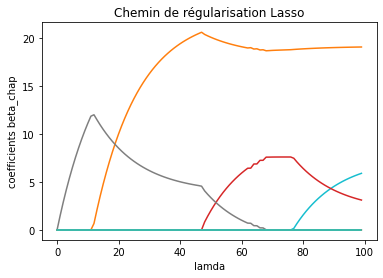

In [30]:
# Tracer le chemin de la régularisation pour différentes valeurs de lamda
plt.plot(coef1.T)
plt.xlabel('lamda')
plt.ylabel('coefficients beta_chap')
plt.title('Chemin de régularisation Lasso')
plt.show()

In [31]:
# Créer des objets LassoCV, RidgeCV et ElasticNetCV
lasso_model2 = LassoCV()
ridge_model2 = RidgeCV()
enet_model2 = ElasticNetCV()

# Entraîner les modèles en utilisant les données d'entraînement
lasso_model2.fit(X2_train, Y2_train)
ridge_model2.fit(X2_train, Y2_train)
enet_model2.fit(X2_train, Y2_train)

# Afficher la valeur optimale du paramètre de régularisation pour chaque modèle
print("val_opt_Lasso: alpha =", lasso_model2.alpha_)
print("val_opt_Ridge: alpha =", ridge_model2.alpha_)
print("val_opt_Elastic Net: alpha =", enet_model2.alpha_)


val_opt_Lasso: alpha = 0.024466829941309606
val_opt_Ridge: alpha = 0.1
val_opt_Elastic Net: alpha = 0.04893365988261919


In [32]:
# Prédire les valeurs de Y à l'aide des modèles entraînés
lasso_pred2 = lasso_model2.predict(X2_test)
ridge_pred2 = ridge_model2.predict(X2_test)
enet_pred2 = enet_model2.predict(X2_test)

# Calculer les erreurs quadratiques moyennes et les coefficients de détermination pour chaque modèle
lasso_mse2 = mean_squared_error(Y2_test, lasso_pred2)
lasso_r22 = r2_score(Y2_test, lasso_pred2)

ridge_mse2 = mean_squared_error(Y2_test, ridge_pred2)
ridge_r22 = r2_score(Y2_test, ridge_pred2)

enet_mse2 = mean_squared_error(Y2_test, enet_pred2)
enet_r22 = r2_score(Y2_test, enet_pred2)

# Afficher les performances des modèles
print("Lasso MSE:", lasso_mse2)
print("Lasso R²:", lasso_r22)

print("Ridge MSE:", ridge_mse2)
print("Ridge R²:", ridge_r22)

print("Elastic Net MSE:", enet_mse2)
print("Elastic Net R²:", enet_r22)

Lasso MSE: 1.7594633769136518
Lasso R²: 0.993809827753905
Ridge MSE: 2.8173049675385853
Ridge R²: 0.9900881125190373
Elastic Net MSE: 6.84833410302303
Elastic Net R²: 0.9759060812218321


##### Obersavtion: 


On remarque qu'en diminuant l'échantillon avec les variables explicatives qui sont corrélées, le meilleur estimateur est l'estimateur Ridge.
En effet, son erreur quadratique est la plus petite.

## Conclusion:

On constate que d'après les deux dernières estimations, quand le nombre de variables explicatives incluent dans le modèle de régression ou quand la taille de l’échantillon est réduite(petite) avec des variables explicatives qui sont fortement  corrélées, le meilleur estimateur dans ces cas  est l'estimateur  Ridge, car  Lasso aura du mal à sélectionner les variables utiles pour notre modèle de prédiction. 
 

Et quand on est en grande dimension c-à-d que l'échantillon est très grand, l'estimateur Lasso est le meilleur dans ce cas car il nous selectionne les meilleures variables explicatives pour avoir un meilleur modèle de prédiction qui est notre objectif du départ.  


#### Partie 2: Application  sur des données réelles 

Nous allons appliquer ces méthodes d'estimations sur les données ozone.
Nous souhaitons donc prédire la concentration d'ozone  maximale du lendemain (maxo3) en fonction des facteurs météorologiques, tel que la température(T), la nébulosité(Ne), vitesse du vent(Vx) et la concentration d'ozone de la veille(maxO 3v) sur trois créneaux horaires différents (9h-12h et 15h)

##### Etape 1 : Importation du dataset

In [33]:
#Importation du fichier ozone:
ozone=pd.read_csv('Ozone.csv')

In [34]:
#Extraction de la concentration d'ozone de la veille et ses caractéristiques:
data=ozone[['maxO3','T9', 'T12', 'T15','Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15', 'maxO3v' ]]


In [35]:
#Extraction de la variable à prédire qui  est la concentration d'ozone du lendemain(maxO3)
Y=data['maxO3']


In [36]:
#Extraction des caractéristiques de la concentration d'ozone:
X=data[['T9', 'T12', 'T15','Ne9', 'Ne12', 'Ne15', 'Vx9', 'Vx12', 'Vx15', 'maxO3v' ]]

In [37]:
# Séparer les données en deux parties : une pour l'entraînement et une autre pour les tests
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.34)

In [38]:
#Estimation avec lasso, Ridge, ElasticNetCV 
# Créer des objets LassoCV, RidgeCV et ElasticNetCV
lasso_model5 = LassoCV()
ridge_model5 = RidgeCV()
enet_model5 = ElasticNetCV()

# Entraîner les modèles en utilisant les données d'entraînement
lasso_model5.fit(X3_train, Y3_train)
ridge_model5.fit(X3_train, Y3_train)
enet_model5.fit(X3_train, Y3_train)

# Afficher la valeur optimale du paramètre de régularisation pour chaque modèle
print("val_opt_Lasso: alpha =", lasso_model2.alpha_)
print("val_opt_Ridge: alpha =", ridge_model2.alpha_)
print("val_opt_Elastic Net: alpha =", enet_model2.alpha_)

val_opt_Lasso: alpha = 0.024466829941309606
val_opt_Ridge: alpha = 0.1
val_opt_Elastic Net: alpha = 0.04893365988261919


In [39]:
#Phase de vérification du meilleur estimateur dans notre cas : 
# Prédire les valeurs de  de la concentration d'ozone du lendemain à l'aide des modèles entraînés
lasso_pred5 = lasso_model5.predict(X3_test)
ridge_pred5 = ridge_model5.predict(X3_test)
enet_pred5 = enet_model5.predict(X3_test)

# Calculer les erreurs quadratiques moyennes et les coefficients de détermination pour chaque modèle
lasso_mse4 = mean_squared_error(Y3_test, lasso_pred5)
lasso_r24 = r2_score(Y3_test, lasso_pred5)

ridge_mse4 = mean_squared_error(Y3_test, ridge_pred5)
ridge_r24 = r2_score(Y3_test, ridge_pred5)

enet_mse4 = mean_squared_error(Y3_test, enet_pred5)
enet_r24 = r2_score(Y3_test, enet_pred5)

# Afficher les performances des modèles
print("Lasso MSE:", lasso_mse2)
print("Lasso R²:", lasso_r22)

print("Ridge MSE:", ridge_mse2)
print("Ridge R²:", ridge_r22)

print("Elastic Net MSE:", enet_mse2)
print("Elastic Net R²:", enet_r22)


Lasso MSE: 1.7594633769136518
Lasso R²: 0.993809827753905
Ridge MSE: 2.8173049675385853
Ridge R²: 0.9900881125190373
Elastic Net MSE: 6.84833410302303
Elastic Net R²: 0.9759060812218321


##### Affichage de la concentration d'ozone prédite : 

In [40]:
print("Prédiction avec Lasso:", lasso_pred5)
print("Prédiction avec Ridge:", ridge_pred5)
print("Prédiction avec Elastic-Net:", enet_pred5)


Prédiction avec Lasso: [ 73.82304605  76.23591987  90.9922904  128.24618725  88.02716756
  80.30061474  92.20803019  44.82989291 172.92221253  81.70417887
  99.65194032  78.17768723 163.18440177  99.43273686 125.89164257
  69.98281513  99.21913783 134.88436184 125.48977645  52.60720329
  81.37259706 141.72853811 105.72601308  89.80794368  74.53735284
 116.88588316  87.48244819 148.87705524  92.17040749 134.25298731
 147.8091965   81.27178741  98.44568396 108.17884604 106.17433401
  83.8049007   96.40338575 153.90052283  77.47822969]
Prédiction avec Ridge: [ 71.24484838  74.6583065   87.95723645 123.01914174  88.53390529
  75.87837941  91.41349046  43.19801785 174.47720921  76.74855781
  97.32613279  77.32911949 163.95324178  97.53650408 129.22716985
  69.39220628  94.79738046 134.96123747 124.9496768   49.92825966
  80.13705839 143.20244724 103.40954001  90.74409899  76.8244246
 124.28230268  90.33943123 150.6064153   93.35623988 137.57658598
 148.61800832  82.45695038  95.12716852 107

In [41]:
pd.DataFrame(lasso_pred5)

,0
0,73.823046
1,76.235920
2,90.992290
3,128.246187
4,88.027168
5,80.300615
6,92.208030
7,44.829893
8,172.922213
9,81.704179


#### Présentation graphique de la concentration d'ozone prédite avec chaque estimateeur

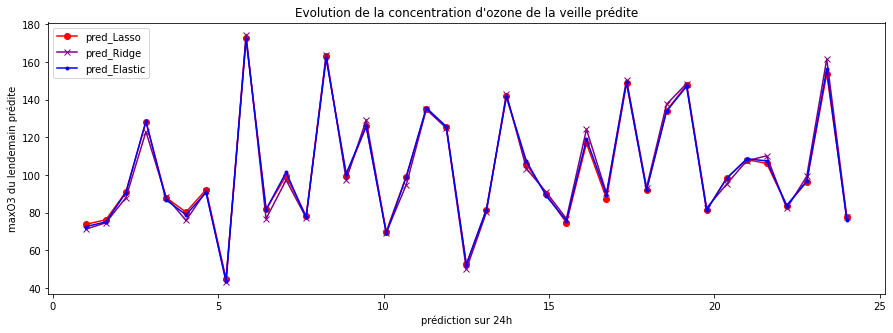

In [42]:
x=np.linspace(1, 24, 39)
figure(figsize=(15, 5))
plt.plot(x,lasso_pred5,marker='o', c="red", label="pred_Lasso")
plt.plot(x,ridge_pred5,marker='x', c="purple", label="pred_Ridge")
plt.plot(x,enet_pred5,marker='.', c="blue", label="pred_Elastic")
plt.legend()
plt.title("Evolution de la concentration d'ozone de la veille prédite")
plt.xlabel('prédiction sur 24h')
plt.ylabel('maxO3 du lendemain prédite')
plt.show()